# Random Forest for Asthma Disease Prediction

In [1]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier


In [2]:
# loading data
df = pd.read_csv('/kaggle/input/csp-dataset/processed-data.csv')
df

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,1,1,1,1,0,0
1,1,1,1,1,1,1,1,1,0,0
2,1,1,1,1,1,1,1,1,0,0
3,1,1,1,1,1,1,1,0,1,0
4,1,1,1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,0,0,0,0,0
316796,0,0,0,0,0,0,0,0,0,0
316797,0,0,0,0,0,0,0,0,0,1
316798,0,0,0,0,0,0,0,0,0,1


In [3]:
# dropping tables and renaming columns
df = df.drop(columns=['Severity_Mild', 'Severity_Moderate'])
df.rename(columns={'Severity_None': 'Target'}, inplace=True)

In [4]:
df.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Target
0,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,0
4,1,1,1,1,1,1,1,0


In [5]:
# Displaying basic statistics
df.describe()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Target
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.500000,0.562500,0.500000,0.312500,0.363636,0.545455,0.545455,0.250000
std,0.500001,0.496079,0.500001,0.463513,0.481046,0.497930,0.497930,0.433013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,0.500000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Checking for missing values
df.isnull().sum()

Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Target                     0
dtype: int64

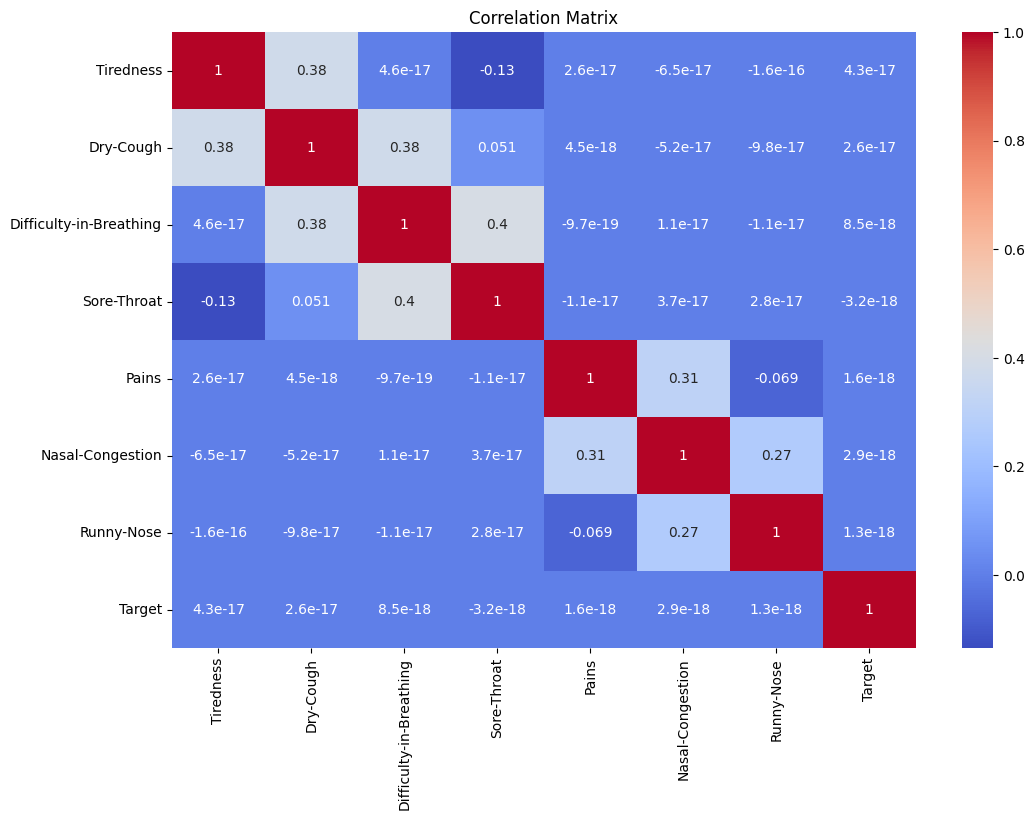

In [7]:
# Correlation matrix to see feature relationships
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

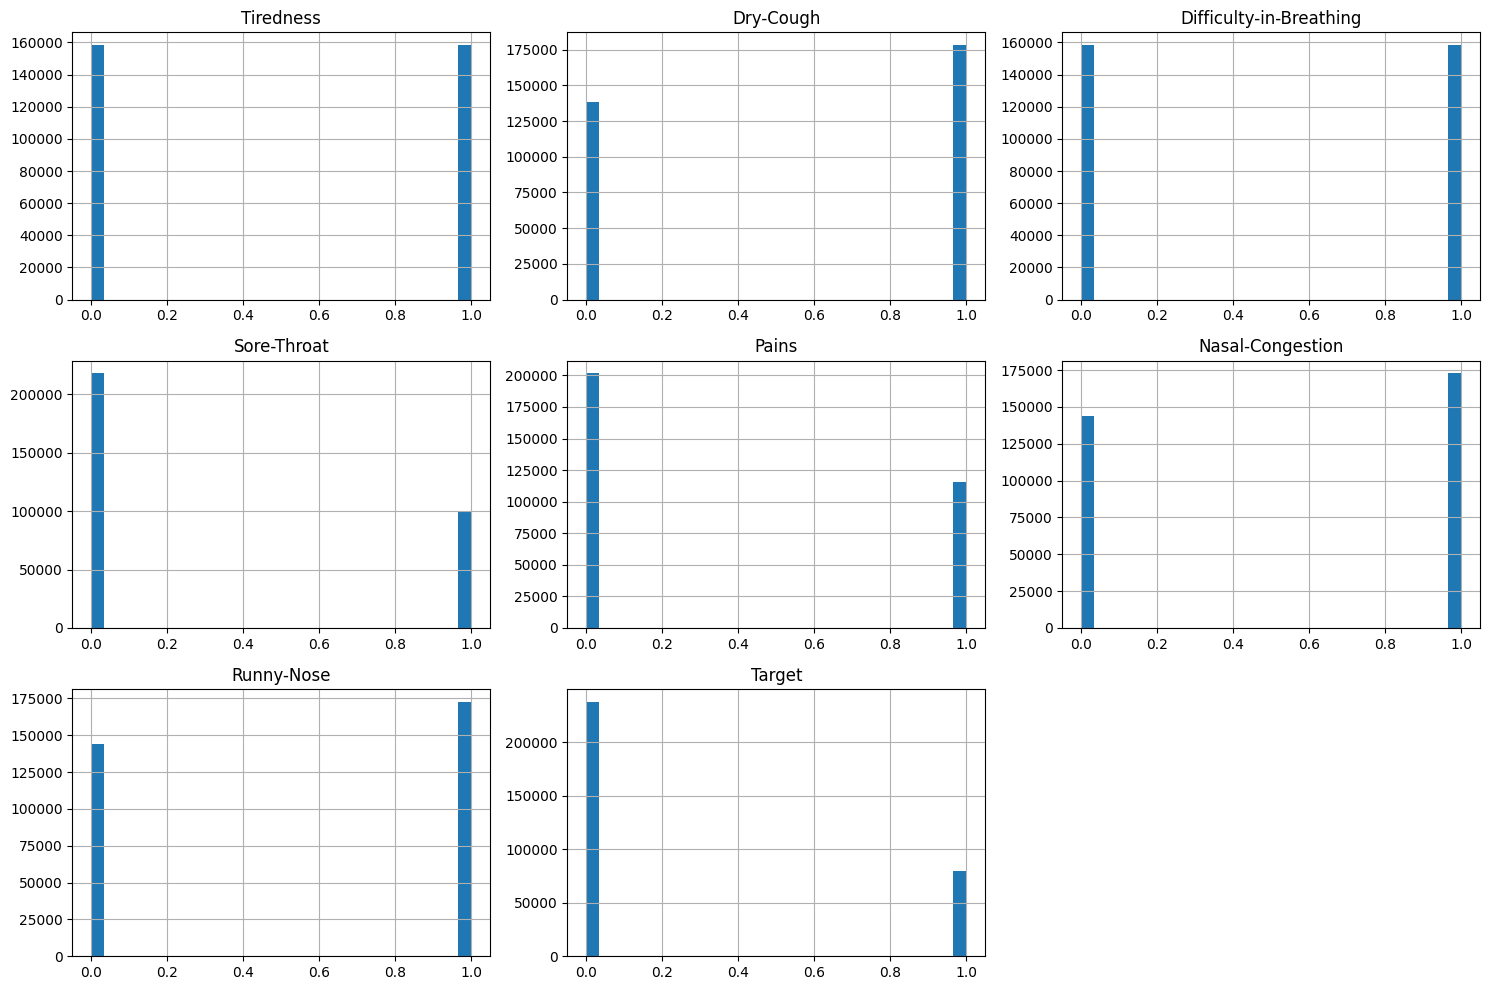

In [8]:
# Distribution of numerical features
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

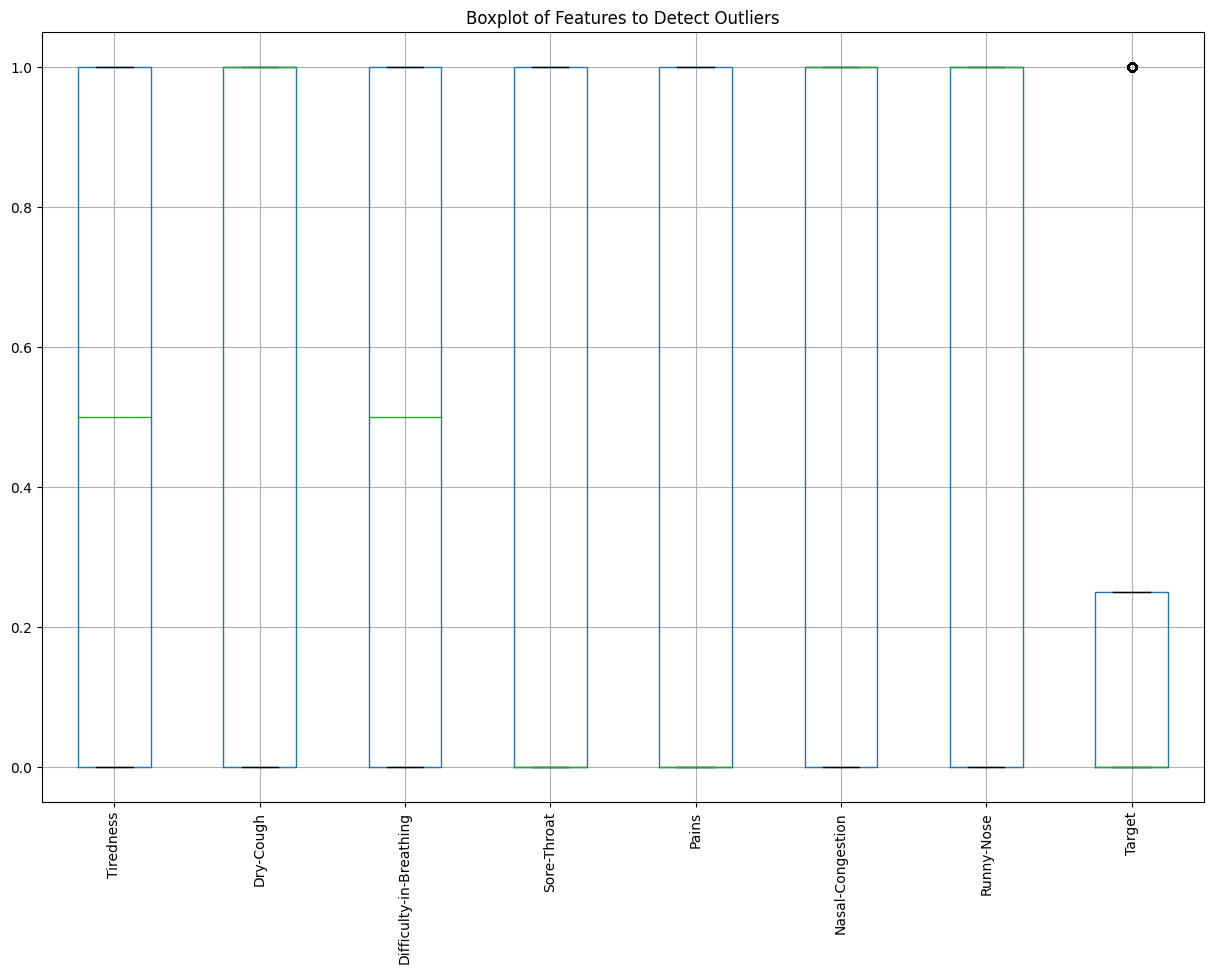

In [9]:
# Boxplots to detect outliers in the dataset
plt.figure(figsize=(15, 10))
df.boxplot()
plt.title('Boxplot of Features to Detect Outliers')
plt.xticks(rotation=90)
plt.show()

In [10]:
x = df.drop(columns=['Target'])
y  = df['Target']

In [11]:
# preparing data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
# building model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
y_hat

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
# metrics
print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_hat), '\n')
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_hat), '\n')


**** ACCURACY_SCORE **** 

 0.7513099747474747 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       0.75      1.00      0.86     47603
           1       0.00      0.00      0.00     15757

    accuracy                           0.75     63360
   macro avg       0.38      0.50      0.43     63360
weighted avg       0.56      0.75      0.64     63360
 



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Splitting data into features (X) and target (y)
X = df.drop(columns=['Target'])
y = df['Target']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Logistic Regression Evaluation
print('Logistic Regression Performance:')
print(classification_report(y_test, lr_predictions))
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'Accuracy: {lr_accuracy:.2f}')

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     47603
           1       0.00      0.00      0.00     15757

    accuracy                           0.75     63360
   macro avg       0.38      0.50      0.43     63360
weighted avg       0.56      0.75      0.64     63360

Accuracy: 0.75


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
